# Machine Learning 2022
## Lab. 2 - Regresja Liniowa

### Imię i nazwisko: Kacper Moździerz
### Nr albumu: 401733
### Data: 8.03.2022

### Grupa: wtorek 9:30 - 11:00


## Exercises realization - Linear regression with one variable

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
path = os.getcwd() + '/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

Ex. 1 - head() and describe() methods

In [3]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Ex. 2 - scatter plot of analyzed data

<Figure size 432x288 with 0 Axes>

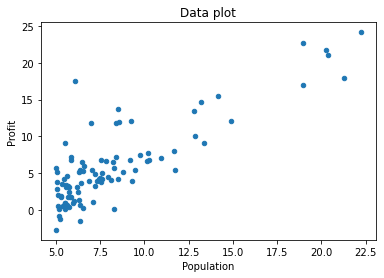

In [5]:
plt.figure()
data.plot.scatter(x='Population', y='Profit')
plt.title("Data plot")
plt.show()

Ex. 3 - insterting column of ones in dataframe

In [6]:
data.insert(loc=0, column='1s', value=1)

In [7]:
data.head()

,1s,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


Ex. 4 - spliting data for x and y sets

In [8]:
X = data[['1s', 'Population']]
y = data['Profit']


In [9]:
X.head()

,1s,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [10]:
y.head()

0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: Profit, dtype: float64

In [11]:
X_ = np.matrix(X.values)
y_ = np.matrix(y.values)
theta_ = np.matrix(np.array([0,0]))


Ex. 5 - implementation of cost function

In [12]:
def computeCost(X, y, theta):
    fx = theta @ X.T
    m = X.shape[0]
    return 1/(2*m) * np.power((fx-y),2).sum()

    

Ex. 6 - computing cost for prepared data for theta = [0,0]

In [13]:
computeCost(X_,y_,theta_)

32.072733877455676

Ex. 7 - implementation of simple gradient function

In [14]:
def simple_gradient(X, y, theta, alpha=0.01, it=1000):
    m = X.shape[0]
    cost = []
    for i in range(it):
        h = theta @ X.T
        theta= theta -(alpha / m) * ((h-y)*X).sum(axis=0)
        cost.append(computeCost(X,y,theta))
    return theta, cost

Ex. 8 - computing of optimal theta values

In [15]:
theta, cost = simple_gradient(X_,y_,theta_)
print(f"Optimal values of theta parameter: {theta}")

Optimal values of theta parameter: [[-3.24140214  1.1272942 ]]


Ex. 9

In [16]:
print(f"For computed optimal theta values,\n value of cost function is: {cost[-1]}")

For computed optimal theta values,
 value of cost function is: 4.515955503078914


Ex. 10 - regression plot

<Figure size 432x288 with 0 Axes>

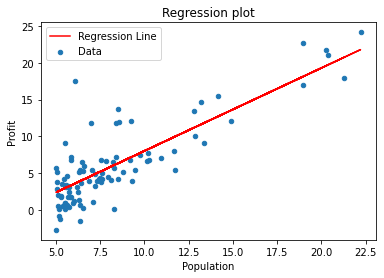

In [17]:
y_reglin = X_ @ theta.T
plt.figure()
data.plot.scatter(x='Population', y='Profit')
plt.plot(X_[:,1], y_reglin, 'r')
plt.legend(["Regression Line","Data"])
plt.title("Regression plot")
plt.show()

Ex. 11 - cost values plot 

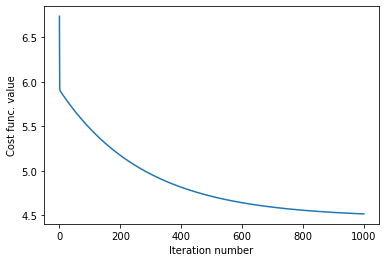

In [18]:
plt.figure()
plt.plot(cost)
plt.xlabel("Iteration number")
plt.ylabel("Cost func. value")
plt.show()

## Exercises realization - Linear regression with multiple variables

In [19]:
path = os.getcwd() + '/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


Ex. 1 - data normalization

In [20]:
data_normalized = (data2 - data2.mean()) / data2.std()
data_normalized.head(5)

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


Ex. 2 - insterting column of ones in dataframe and data spliting for x and y

In [21]:
data_normalized.insert(loc=0, column='1s', value=1)

In [22]:
X2 = data_normalized[['1s', 'Size', 'Bedrooms']]
y2 = data_normalized['Price']


X2_ = np.matrix(X2.values)
y2_ = np.matrix(y2.values)
theta2_ = np.matrix(np.array([0,0,0]))

Ex.2 - computing cost for prepared data for theta = [0,0,0]

In [23]:
computeCost(X2_,y2_,theta2_)

0.4893617021276596

Ex.2 - computing of optimal theta values

In [24]:
theta2, cost2 = simple_gradient(X2_, y2_, theta2_, 0.01, 1000)
print(f"Optimal values of theta parameter: {theta2}")

Optimal values of theta parameter: [[-1.11134506e-16  8.78503652e-01 -4.69166570e-02]]


In [25]:
print(f"For computed optimal theta values,\n value of cost function is: {cost2[-1]}")

For computed optimal theta values,
 value of cost function is: 0.13070336960771892


Ex.2 - Regression plots for x1 and x2

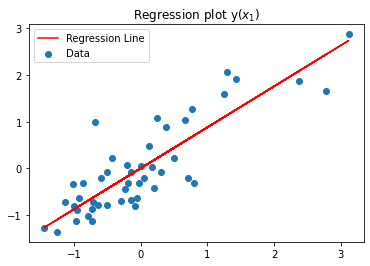

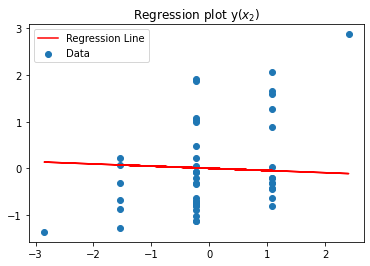

In [26]:
for i in range(1,3):
    y_reglin2 = np.array(theta2[0,0] + theta2[0,i] * X2_[:, i])
    plt.figure()
    plt.scatter(np.array(X2_[:,i]), np.array(y2_.T))
    plt.plot(X2_[:,i], y_reglin2, 'r')
    plt.legend(["Regression Line","Data"])
    plt.title(f"Regression plot y($x_{i}$)")
    plt.show()

Ex.2 - cost function values plot

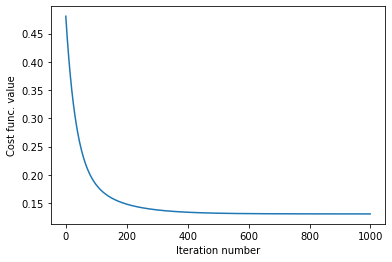

In [27]:
plt.figure()
plt.plot(cost2)
plt.xlabel("Iteration number")
plt.ylabel("Cost func. value")
plt.show()

## Exercises realization - Linear regression - Python packages

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model as linm
  
# Load the diabetes dataset
boston = datasets.load_boston()
# print description
print(boston.DESCR)
# get the data
boston_X = boston.data
boston_Y = boston.target

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Ex.1

In [29]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error

Data normalization

In [30]:
for i in range(boston_X.shape[1]):
    boston_X[:, i] = (boston_X[:, i] - boston_X[:, i].mean()) / boston_X[:, i].std()
    
boston_Y = (boston_Y - boston_Y.mean()) / boston_Y.std()

Dividing the database into training and testing.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(boston_X, boston_Y,test_size=0.3)

Ex.2 - linear model

In [32]:
lin_model = linear_model.LinearRegression()
lin_model.fit(X_train, y_train)

# prediction
y_predicted = lin_model.predict(X_test)

# Coefficients 
print(f'Computed regression coefficients: {lin_model.coef_}\n')

# Prediction errors
print(f'Mean Absoltue Error: {mean_absolute_error(y_test, y_predicted)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_predicted)}')


Computed regression coefficients: [-0.13474402  0.14872199  0.00129153  0.05984431 -0.29866474  0.26145416
  0.03654165 -0.42101474  0.34126556 -0.21174122 -0.22474742  0.1171571
 -0.45793599]

Mean Absoltue Error: 0.38328312117102814
Mean Squared Error: 0.24275575382828932


Ex. 2 - Regression plots

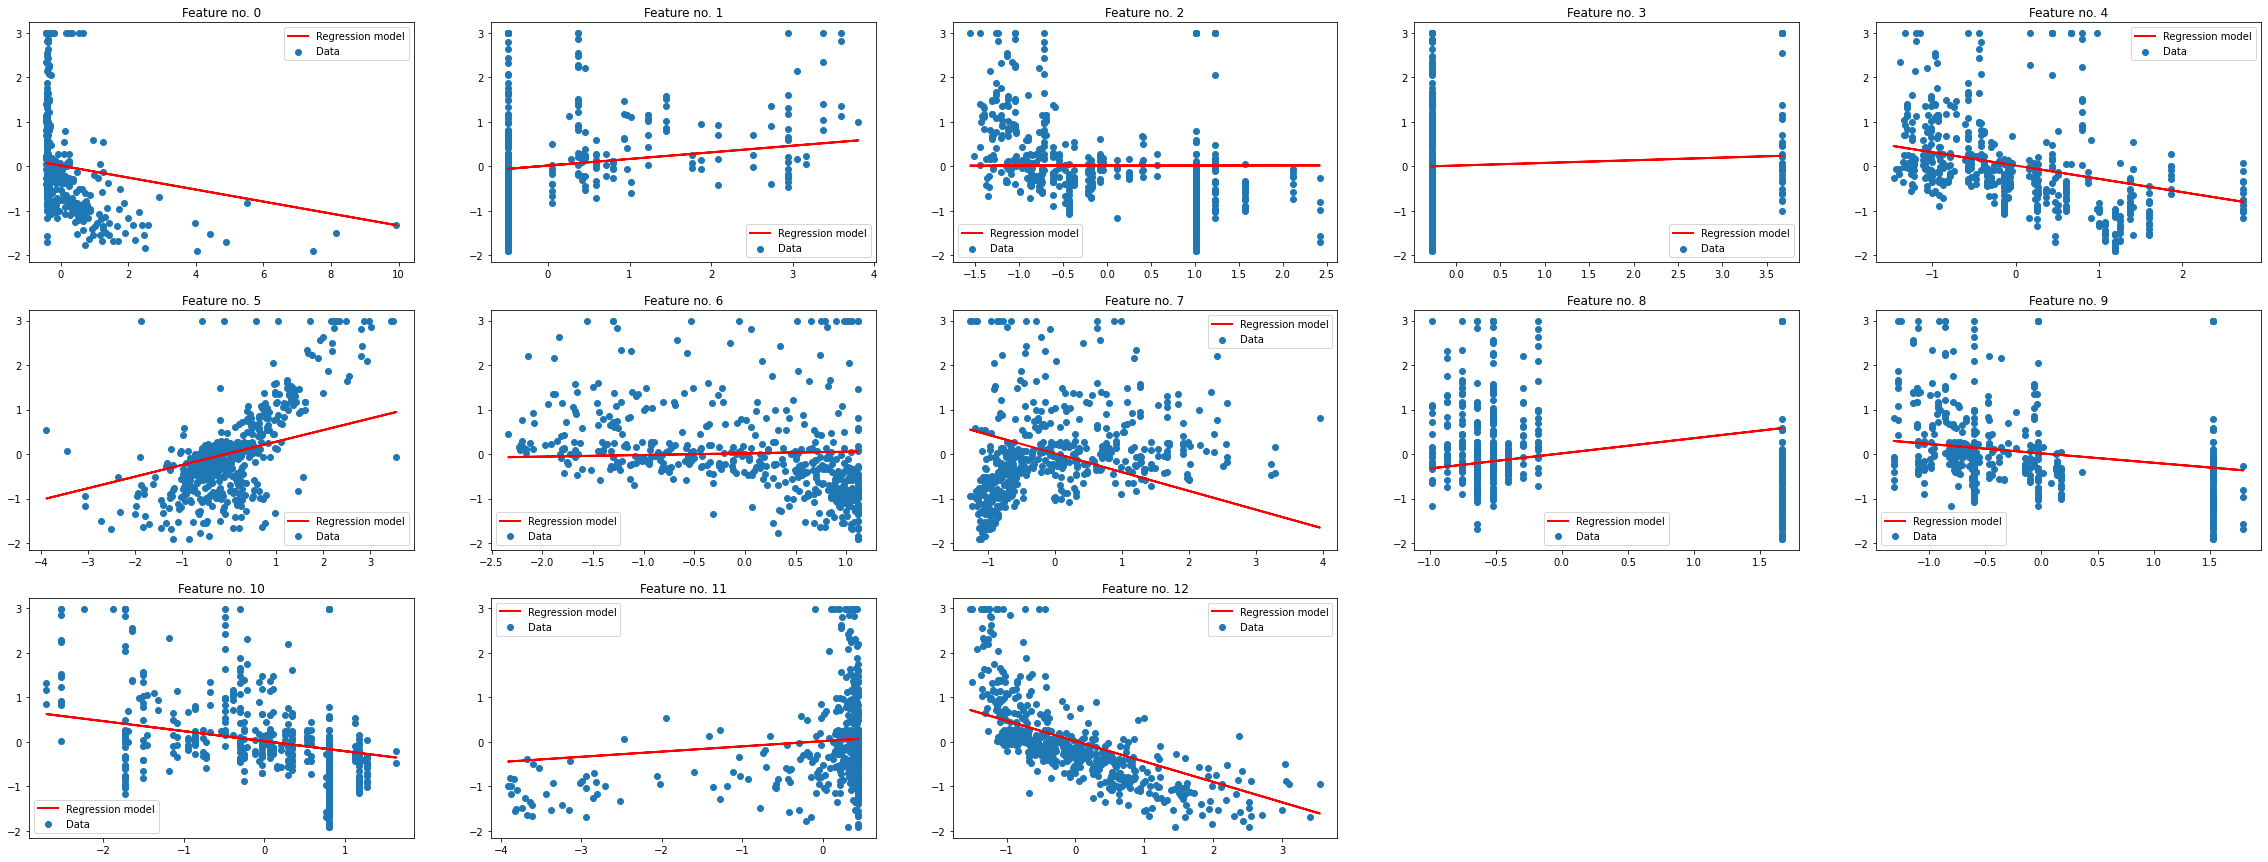

In [33]:
plt.figure(figsize=[40, 15])

for i in range(boston_X.shape[1]):
    y_predicted = lin_model.intercept_ + lin_model.coef_[i] * boston_X[:, i] # regr.intercept_ - parametr b (theta_0)
    plt.subplot(3, 5, i+1)
    plt.scatter(boston_X[:, i], boston_Y)
    plt.plot(boston_X[:, i], y_predicted, 'r', linewidth=2)
    plt.legend(['Regression model', 'Data'])
    plt.title(f"Feature no. {i}")

### Additional - methods compare

In [34]:
reg_LinReg =linm.LinearRegression()
reg_Ridge = linm.Ridge(alpha = .5)
reg_Lasso = linm.Lasso(alpha = 5.1)
reg_ElNet =linm.ElasticNet(alpha = .5, l1_ratio=0.5)

In [35]:
def compare_models(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
    model.fit(X_train, y_train)
    y_predicted = model.predict(X_test)
    print(model)
    print(f'Mean Absoltue Error: {mean_absolute_error(y_test, y_predicted)}')
    print(f'Mean Squared Error: {mean_squared_error(y_test, y_predicted)}\n')


compare_models(reg_LinReg, boston_X, boston_Y)
compare_models(reg_Ridge, boston_X, boston_Y)
compare_models(reg_Lasso, boston_X, boston_Y)
compare_models(reg_ElNet, boston_X, boston_Y)

    


LinearRegression()
Mean Absoltue Error: 0.3820337596530229
Mean Squared Error: 0.2790167416001202

Ridge(alpha=0.5)
Mean Absoltue Error: 0.3724125183980559
Mean Squared Error: 0.28384944400634077

Lasso(alpha=5.1)
Mean Absoltue Error: 0.8384163038747001
Mean Squared Error: 1.2589425467368345

ElasticNet(alpha=0.5)
Mean Absoltue Error: 0.48117605910528616
Mean Squared Error: 0.46794810304953915

